In [2]:
import pandas as pd

Importo el dataset de Teletrabajo y hago el mismo grafico de la nota

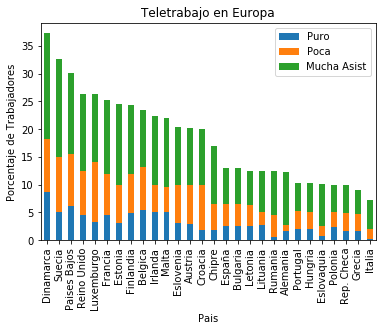

In [7]:
df = pd.read_csv('Teletrabajo.csv', sep=';', encoding='ANSI', decimal=',')
df.head()
df.columns = ['Pais','Puro','Poca','Mucha Asist']
dfHome = df
grafico_1 = dfHome.plot(kind = 'bar', stacked = 'True', title = 'Teletrabajo en Europa', x = 'Pais')
grafico_1.set_ylabel('Porcentaje de Trabajadores')
grafico_1

Importo tabla de paises

In [14]:
dfPaises = pd.read_csv('Paises.csv', sep=';', encoding='ANSI')
dfPaises = dfPaises.set_index("País")
dfPaises.head()


,Country
País,
Alemania,Germany
Austria,Austria
Belgica,Belgium
Bulgaria,Bulgaria
Chipre,Cyprus


Importo datos poblacion y pongo condicion de 2015

In [10]:
df2 = pd.read_csv("data.csv")

dfPop2015 = df2[(df2.Variant=="Medium") & (df2.Time == 2015) & (df2.Location.isin(dfPaises.Country))] #Filtro solo los de 2015 para tener la sumatoria de poblacion
dfPop2015 = dfPop2015.set_index("Location")
dfPop2015.head()

,LocID,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
Location,,,,,,,,,
Austria,40,2,Medium,2015,2015.5,4248.656,4430.011,8678.667,105.312
Belgium,56,2,Medium,2015,2015.5,5548.634,5739.297,11287.931,372.785
Bulgaria,100,2,Medium,2015,2015.5,3501.634,3698.105,7199.739,66.320
Croatia,191,2,Medium,2015,2015.5,2035.405,2197.469,4232.874,75.641
Cyprus,196,2,Medium,2015,2015.5,581.395,579.592,1160.987,125.648


Importo el archivo de home office

Sumo una columna pais al otro dataframe para poder comparar en el mismo idioma y luego le agrego el Pop Total del df population, pero primero necesito que los indices sean iguales...

In [17]:
dfHome = dfHome.set_index('Pais')
dfHome['Country'] = dfPaises.Country
dfHome.head()

,Puro,Poca,Mucha Asist,Country
Pais,,,,
Dinamarca,8.75,9.45,19.1,Denmark
Suecia,5.00,9.90,17.8,Sweden
Paises Bajos,6.20,9.30,14.7,Netherlands
Reino Unido,4.50,8.00,13.8,United Kingdom
Luxemburgo,3.20,10.80,12.3,Luxembourg


In [18]:
dfHome = dfHome.set_index('Country')
dfHome.head()

,Puro,Poca,Mucha Asist
Country,,,
Denmark,8.75,9.45,19.1
Sweden,5.00,9.90,17.8
Netherlands,6.20,9.30,14.7
United Kingdom,4.50,8.00,13.8
Luxembourg,3.20,10.80,12.3


In [19]:
dfHome['PopTotal'] = dfPop2015.PopTotal
dfHome.head()

,Puro,Poca,Mucha Asist,PopTotal
Country,,,,
Denmark,8.75,9.45,19.1,5688.695
Sweden,5.00,9.90,17.8,9764.949
Netherlands,6.20,9.30,14.7,16938.492
United Kingdom,4.50,8.00,13.8,65860.149
Luxembourg,3.20,10.80,12.3,566.741


Calculo las columnas de cantidad

In [20]:
dfHome['PuroCant'] = dfHome.PopTotal*dfHome.Puro
dfHome['PocaCant'] = dfHome.PopTotal*dfHome.Poca
dfHome['MuchaAsistCant'] = dfHome.PopTotal*dfHome['Mucha Asist']
dfHome.head()

,Puro,Poca,Mucha Asist,PopTotal,PuroCant,PocaCant,MuchaAsistCant
Country,,,,,,,
Denmark,8.75,9.45,19.1,5688.695,49776.08125,53758.16775,108654.0745
Sweden,5.00,9.90,17.8,9764.949,48824.74500,96672.99510,173816.0922
Netherlands,6.20,9.30,14.7,16938.492,105018.65040,157527.97560,248995.8324
United Kingdom,4.50,8.00,13.8,65860.149,296370.67050,526881.19200,908870.0562
Luxembourg,3.20,10.80,12.3,566.741,1813.57120,6120.80280,6970.9143


Le sumo columna del total de los "home officers", sumando las que calcule recien

In [21]:
dfHome['HomeOfficers'] = dfHome.PuroCant+dfHome.PocaCant+dfHome.MuchaAsistCant
dfHome.head()

,Puro,Poca,Mucha Asist,PopTotal,PuroCant,PocaCant,MuchaAsistCant,HomeOfficers
Country,,,,,,,,
Denmark,8.75,9.45,19.1,5688.695,49776.08125,53758.16775,108654.0745,2.121883e+05
Sweden,5.00,9.90,17.8,9764.949,48824.74500,96672.99510,173816.0922,3.193138e+05
Netherlands,6.20,9.30,14.7,16938.492,105018.65040,157527.97560,248995.8324,5.115425e+05
United Kingdom,4.50,8.00,13.8,65860.149,296370.67050,526881.19200,908870.0562,1.732122e+06
Luxembourg,3.20,10.80,12.3,566.741,1813.57120,6120.80280,6970.9143,1.490529e+04


Ordeno por la columna creada para que tenga sentido el grafico

In [22]:
dfHome = dfHome.sort_values('HomeOfficers', ascending=False)
dfHome.head()

,Puro,Poca,Mucha Asist,PopTotal,PuroCant,PocaCant,MuchaAsistCant,HomeOfficers
Country,,,,,,,,
United Kingdom,4.5,8.0,13.8,65860.149,296370.6705,526881.1920,908870.0562,1.732122e+06
France,4.5,7.5,13.2,64453.194,290039.3730,483398.9550,850782.1608,1.624220e+06
Germany,1.7,1.0,9.5,81787.411,139038.5987,81787.4110,776980.4045,9.978064e+05
Spain,2.5,4.0,6.5,46671.919,116679.7975,186687.6760,303367.4735,6.067349e+05
Netherlands,6.2,9.3,14.7,16938.492,105018.6504,157527.9756,248995.8324,5.115425e+05


Hago el grafico

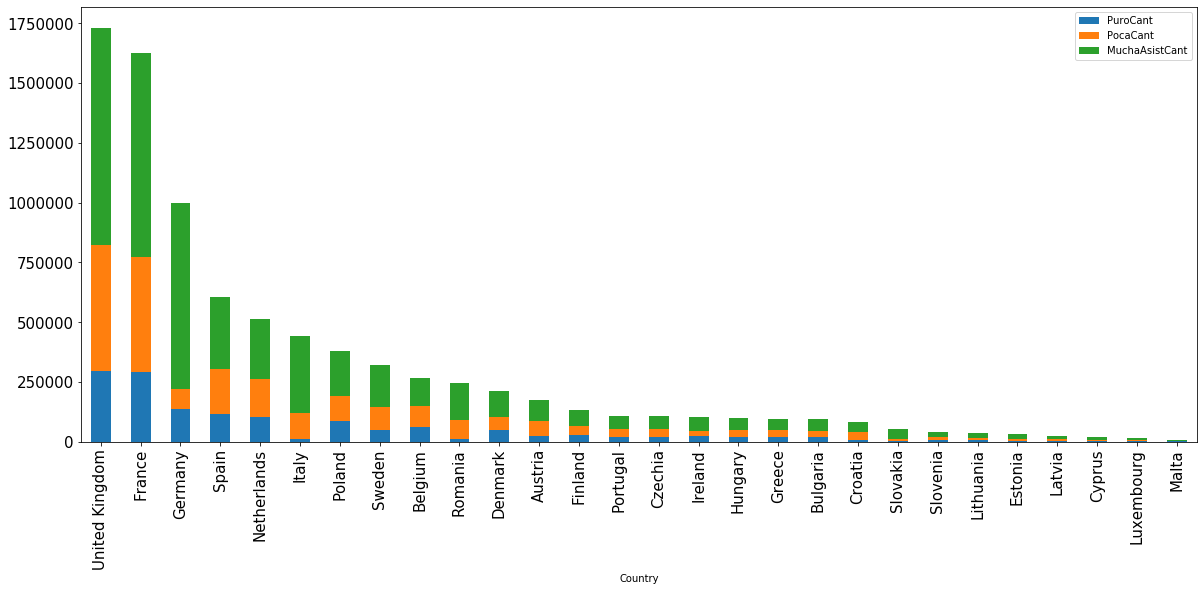

In [23]:
grafico = dfHome[['PuroCant','PocaCant','MuchaAsistCant']].plot(kind='bar', stacked=True, figsize=(20,8), fontsize=15)

grafico